In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.ticker as ticker

In [7]:
import datetime as dt

In [8]:
data = pd.read_csv("gemini_BTCUSD_day.csv")
data.index = data.index[::-1]
data = data.reindex(index=data.index[::-1])

In [9]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.444277e+09,08/10/2015 04:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703
1,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
2,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
3,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
4,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743


In [10]:
data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2289,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
2290,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
2291,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
2292,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2293,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715


In [11]:
data_close = data['Close']

In [12]:
data_close = data_close.values.reshape(len(data_close), 1)

In [13]:
data_date = [None] * len(data['Date'])
for index, i in enumerate(data['Date']):
   data_date[index] = i[6:10] + i[3:5] + i[0:2]

In [14]:
ticker_spacing = data_date
ticker_spacing = 90 # 3 month

In [ ]:
# Matplotlib example

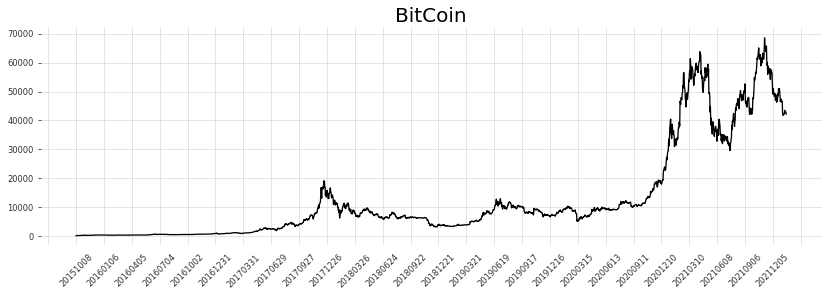

In [25]:
fig, ax = plt.subplots(1,1)
ax.plot(data_date,data_close)
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(rotation = 45)
plt.title("BitCoin", fontsize=20)
plt.show()

In [ ]:
# statsmodels - seasonal_decompose

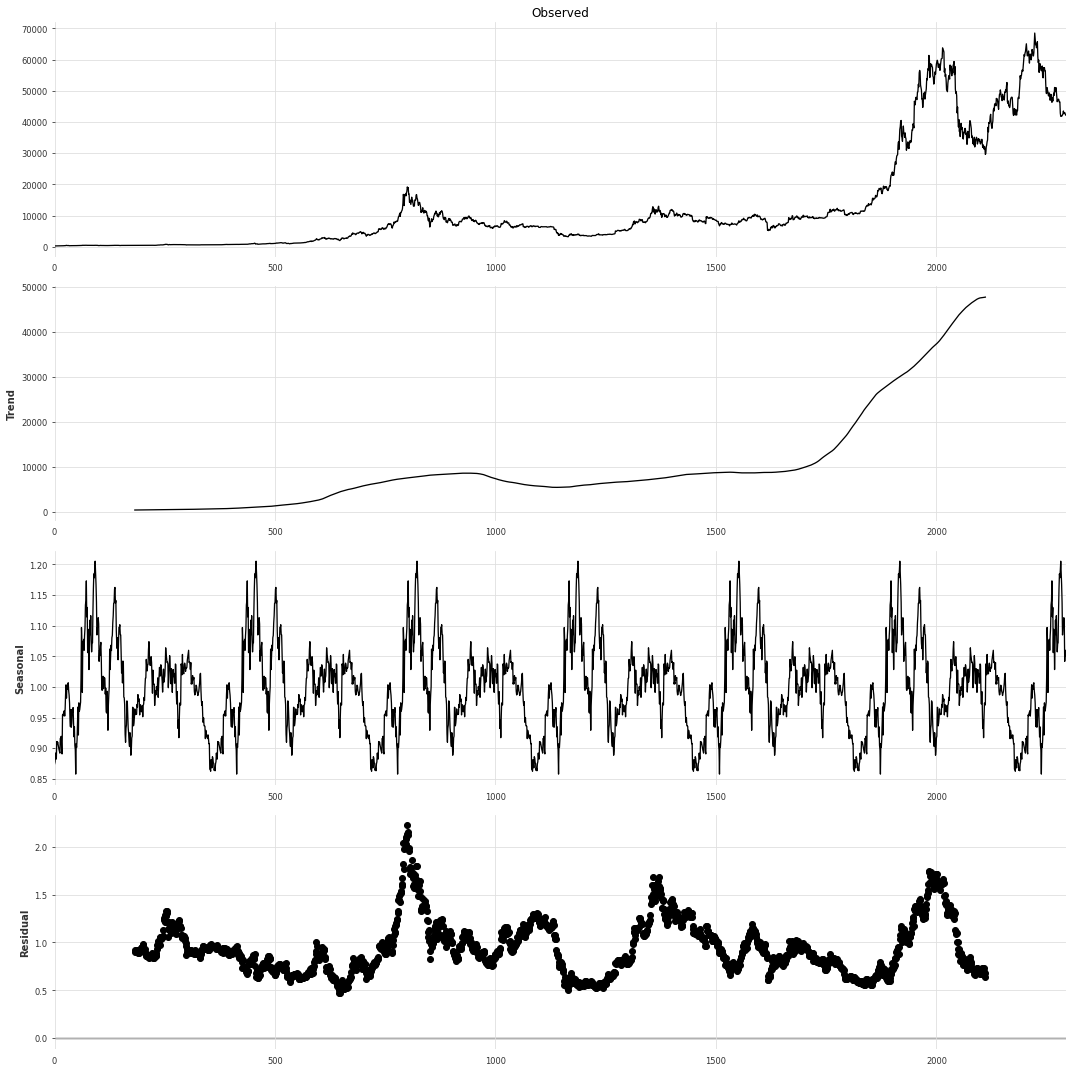

In [16]:
# multiplicative Decomposition: yt = St x Tt x Et*
forecast = seasonal_decompose(data['Close'].values, 'multiplicative', period=365)
plt.rcParams.update({'figure.figsize': (15,15)})
forecast.plot()
plt.show()

In [ ]:
# Darts

In [17]:
data['Date'] = data_date

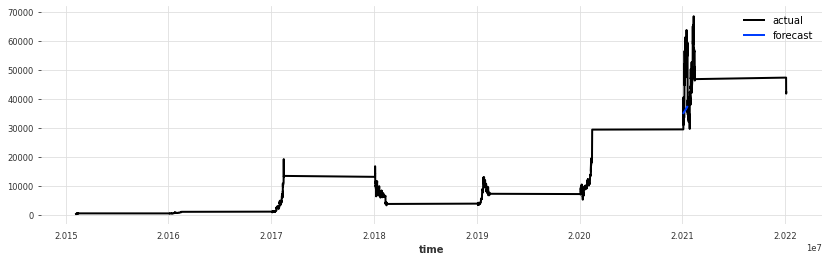

<Figure size 1008x288 with 0 Axes>

In [27]:
series = TimeSeries.from_dataframe(data,'Date','Close')
#train, val = series[:-365], series[-365:]
train, val = series.split_before(len(data) - 365)
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))
series.plot(label='actual')
prediction.plot(label='forecast')
plt.rcParams["figure.figsize"] = (14,4)
plt.legend()
plt.figure()
plt.show()

In [ ]:
# FBprophet

In [78]:
df = pd.read_csv("gemini_BTCUSD_day.csv", usecols = ['Date','Close'])

In [79]:
df.index = data.index[::-1]
df = df.reindex(index=df.index[::-1])

In [80]:
df_date = [None] * len(df['Date'])
for index, i in enumerate(df['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]

In [81]:
df['Date'] = df_date

In [82]:
df['Date']

0       2015-10-08
1       2015-10-09
2       2015-10-10
3       2015-10-11
4       2015-10-12
           ...    
2289    2022-01-13
2290    2022-01-14
2291    2022-01-15
2292    2022-01-16
2293    2022-01-17
Name: Date, Length: 2294, dtype: object

In [83]:
from prophet import Prophet

In [84]:
df.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)

In [85]:
df.head()

,ds,y
0,2015-10-08,243.60
1,2015-10-09,245.51
2,2015-10-10,246.30
3,2015-10-11,248.98
4,2015-10-12,245.75


In [86]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -47.1663
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4640.26    0.00618398       432.629           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4670.46    0.00147611       149.533      0.2214      0.2214      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       4674.14   0.000552049       224.669   4.837e-06       0.001      356  LS failed, Hessian reset 
     299       4676.12    0.00109252       86.3644           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4678.16   0.000690903       113.104      0.5872      0.5872      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     450       4678.59    0.00039602    

21  LS failed, Hessian reset 
     499       4678.66   6.77965e-07       68.0558      0.2946           1      699   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     534       4680.05   0.000266089       166.156   1.366e-06       0.001      787  LS failed, Hessian reset 
     599       4682.21     0.0138681       67.1915      0.5389           1      864   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     605       4682.25    0.00045865       207.226   6.471e-06       0.001      915  LS failed, Hessian reset 
     679       4682.94   9.24103e-05       85.5893    1.44e-06       0.001     1047  LS failed, Hessian reset 
     699       4682.97   0.000261233       77.3788           1           1     1070   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     750          4683   9.07211e-06       76.8047   1.362e-07       0.001     1175  LS failed, Hess

In [87]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
2654,2023-01-13
2655,2023-01-14
2656,2023-01-15
2657,2023-01-16
2658,2023-01-17


In [88]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2654,2023-01-13,92662.858191,84651.902701,101025.621064
2655,2023-01-14,92759.754390,84867.548601,101035.095936
2656,2023-01-15,92908.287231,85021.539630,101113.221682
2657,2023-01-16,93010.009091,84827.027986,101925.393658
2658,2023-01-17,93199.495280,84658.382991,102031.040326


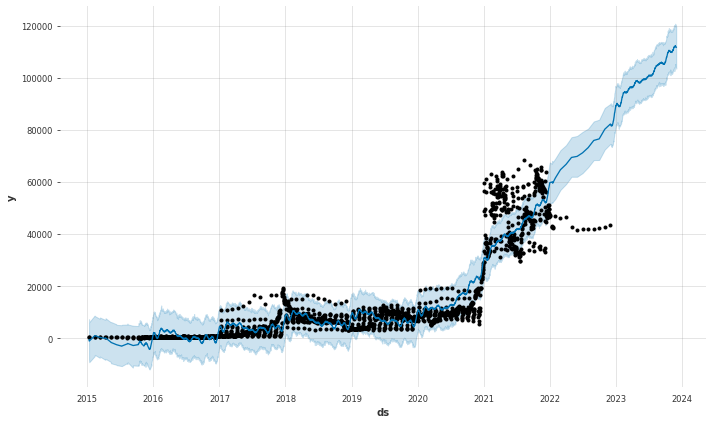

In [58]:
fig1 = m.plot(forecast)

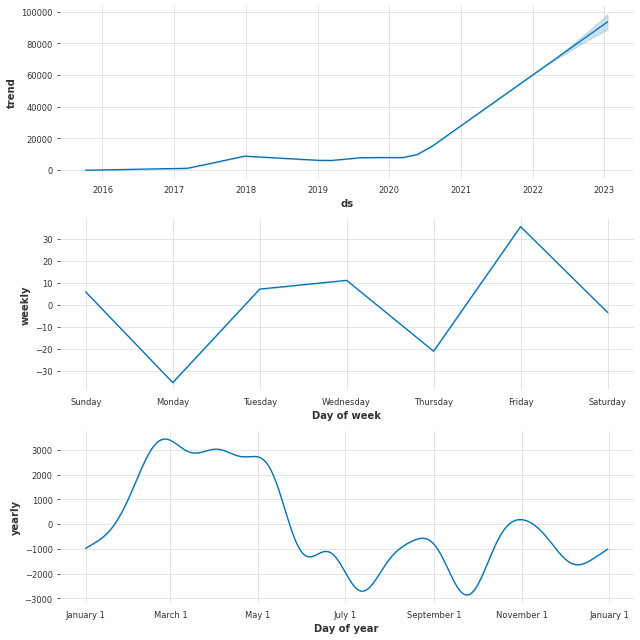

In [89]:
fig2 = m.plot_components(forecast)

In [99]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-10-08,-168.191052,-8868.922921,4981.220346,-168.191052,-168.191052,-1710.211446,-1710.211446,-1710.211446,-21.077876,-21.077876,-21.077876,-1689.133570,-1689.133570,-1689.133570,0.0,0.0,0.0,-1878.402497
1,2015-10-09,-165.976991,-8050.639736,4978.507715,-165.976991,-165.976991,-1514.054621,-1514.054621,-1514.054621,35.622720,35.622720,35.622720,-1549.677341,-1549.677341,-1549.677341,0.0,0.0,0.0,-1680.031612
2,2015-10-10,-163.762931,-8382.780944,4954.356392,-163.762931,-163.762931,-1413.543990,-1413.543990,-1413.543990,-3.392643,-3.392643,-3.392643,-1410.151347,-1410.151347,-1410.151347,0.0,0.0,0.0,-1577.306921
3,2015-10-11,-161.548870,-7818.778134,5321.166012,-161.548870,-161.548870,-1266.030484,-1266.030484,-1266.030484,5.867568,5.867568,5.867568,-1271.898052,-1271.898052,-1271.898052,0.0,0.0,0.0,-1427.579355
4,2015-10-12,-159.334810,-8120.491681,5196.663977,-159.334810,-159.334810,-1171.534775,-1171.534775,-1171.534775,-35.365539,-35.365539,-35.365539,-1136.169236,-1136.169236,-1136.169236,0.0,0.0,0.0,-1330.869585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,2023-01-13,93176.921675,84651.902701,101025.621064,88598.782532,98001.303088,-514.063484,-514.063484,-514.063484,35.622720,35.622720,35.622720,-549.686204,-549.686204,-549.686204,0.0,0.0,0.0,92662.858191
2655,2023-01-14,93264.824084,84867.548601,101035.095936,88669.615457,98100.536556,-505.069694,-505.069694,-505.069694,-3.392643,-3.392643,-3.392643,-501.677051,-501.677051,-501.677051,0.0,0.0,0.0,92759.754390
2656,2023-01-15,93352.726493,85021.539630,101113.221682,88740.448382,98218.984373,-444.439262,-444.439262,-444.439262,5.867568,5.867568,5.867568,-450.306830,-450.306830,-450.306830,0.0,0.0,0.0,92908.287231
2657,2023-01-16,93440.628903,84827.027986,101925.393658,88811.281306,98325.018857,-430.619811,-430.619811,-430.619811,-35.365539,-35.365539,-35.365539,-395.254272,-395.254272,-395.254272,0.0,0.0,0.0,93010.009091


In [100]:
date = '2023-01-13'
for i, row in enumerate(forecast):
    if date == 

0      2015-10-08
1      2015-10-09
2      2015-10-10
3      2015-10-11
4      2015-10-12
          ...    
2654   2023-01-13
2655   2023-01-14
2656   2023-01-15
2657   2023-01-16
2658   2023-01-17
Name: ds, Length: 2659, dtype: datetime64[ns]

In [113]:
str(forecast['ds'][2])

'2015-10-10 00:00:00'

In [123]:
date = '2015-10-10 00:00:00'
for i, row in enumerate(forecast):
    if date == str(forecast['ds'][i]):
        print(forecast['yhat_upper'][i])